In [23]:
%matplotlib inline
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

- Open FV3 tiles and put into a single list

In [24]:
#datadir = "/n/home03/zhuangjw/FV3/outputdata/c48/c48n160/"
#datadir = "/u/jzhuang1/FV3/rundirs/remap_test/output/spinup/"
datadir = "/u/jzhuang1/FV3/rundirs/remap_test/output/continued/"

dsarr=[None]*6
for i in range(6):
    print("opening no.{0} tile...".format(i+1))
    itile=str(i+1)
    ds = xr.open_dataset(datadir+"atmos_daily.tile"+itile+".nc",decode_times=False)
    grid_temp = xr.open_dataset(datadir+"atmos_static.tile"+itile+".nc",decode_times=False)

    ds["grid_lont"] = grid_temp["grid_lont"]
    ds["grid_latt"] = grid_temp["grid_latt"]
    ds.set_coords(["grid_lont","grid_latt"],inplace=True)
    
    dsarr[i]=ds.copy()

opening no.1 tile...
opening no.2 tile...
opening no.3 tile...
opening no.4 tile...
opening no.5 tile...
opening no.6 tile...


- Directly plot on cube-sphere

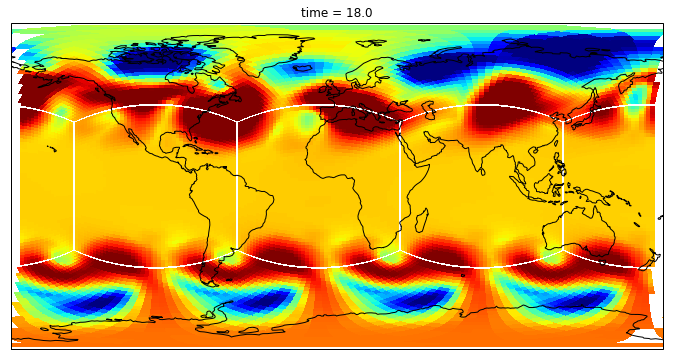

In [28]:
varname="ps"

plt.figure(figsize=(12,6));
ax = plt.axes(projection=ccrs.PlateCarree());

for i in range(6):
    # mask cells near boundaries otherwise they will span the entire map 
    mask_temp = np.abs(dsarr[i]["grid_lont"] - 180) > 5
    dsarr[i][varname].where(mask_temp)[1] \
                     .plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                      x='grid_lont', y='grid_latt', add_colorbar=False,
                                      vmin=0.95e5,vmax=1.02e5,cmap='jet');
    
ax.coastlines();   
ax.set_global();

- Plot zonal mean without regridding to lat-lon

In [4]:
ds_combine = xr.concat(dsarr,dim='grid_yt')

# define two-degree wide bins
lon_bins = np.arange(0, 361, 5)

# define a label for each bin corresponding to the center
lon_center = np.arange(1, 360, 5)

# group according to those bins
group = ds_combine[varname].groupby_bins('grid_lont', lon_bins, labels=lon_center)

# inspect the group dimension
list(group)[0][1].dims

('time', 'pfull', 'stacked_grid_yt_grid_xt')

In [5]:
# take the meridional mean and inspect the new dimension
m_mean = group.mean(dim="stacked_grid_yt_grid_xt")
m_mean.dims

('time', 'pfull', 'grid_lont_bins')

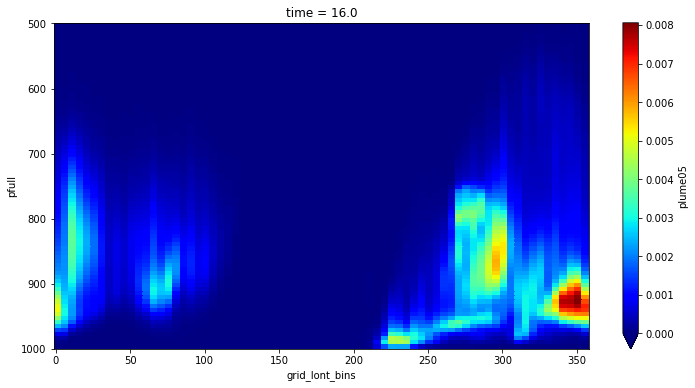

In [6]:
# plot the meridional mean
plt.figure(figsize=(12,6));

m_mean[-1].sel(pfull=slice(500,1000)) \
          .plot.pcolormesh(yincrease=False,vmin=0,cmap='jet')